<a href="https://colab.research.google.com/github/khushee-g/EEG/blob/main/Mood_Disorder_%26_Healthy_Control_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier from sklearn.model selection import train _test_split # Import train _test_split function
from sklearn import metrics

In [74]:
import random
random.seed(15)

data = pd.read_csv('/content/EEG.machinelearing_data_BRMH 2.csv')


In [75]:
import pandas as pd

feature_cols = data.columns[8:].tolist()
feature_cols += ['specific.disorder']

print(feature_cols)

['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'AB.B.theta.a.FP1', 'AB.B.theta.b.FP2', 'AB.B.theta.c.F7', 'AB.B.theta.d.F3', 'AB.B.theta.e.Fz', 'AB.B.theta.f.F4', 'AB.B.theta.g.F8', 'AB.B.theta.h.T3', 'AB.B.theta.i.C3', 'AB.B.theta.j.Cz', 'AB.B.theta.k.C4', 'AB.B.theta.l.T4', 'AB.B.theta.m.T5', 'AB.B.theta.n.P3', 'AB.B.theta.o.Pz', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.r.O1', 'AB.B.theta.s.O2', 'AB.C.alpha.a.FP1', 'AB.C.alpha.b.FP2', 'AB.C.alpha.c.F7', 'AB.C.alpha.d.F3', 'AB.C.alpha.e.Fz', 'AB.C.alpha.f.F4', 'AB.C.alpha.g.F8', 'AB.C.alpha.h.T3', 'AB.C.alpha.i.C3', 'AB.C.alpha.j.Cz', 'AB.C.alpha.k.C4', 'AB.C.alpha.l.T4', 'AB.C.alpha.m.T5', 'AB.C.alpha.n.P3', 'AB.C

In [76]:
#feature_cols = ['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2','AB.A.delta.c.F7','AB.A.delta.d.F3','AB.A.delta.e.Fz',	'AB.A.delta.f.F4',	'AB.A.delta.g.F8',	'AB.A.delta.h.T3',	'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4',	'AB.A.delta.l.T4',	'AB.A.delta.m.T5',	'AB.A.delta.n.P3',	'AB.A.delta.o.Pz',	'AB.A.delta.p.P4',	'AB.A.delta.q.T6',	'AB.A.delta.r.O1',	'AB.A.delta.s.O2',	'AB.B.theta.a.FP1',	'AB.B.theta.b.FP2',	'AB.B.theta.c.F7',	'AB.B.theta.d.F3',	'AB.B.theta.e.Fz',	'AB.B.theta.f.F4',	'AB.B.theta.g.F8',	'AB.B.theta.h.T3',	'AB.B.theta.i.C3',	'AB.B.theta.j.Cz',	'AB.B.theta.k.C4',	'AB.B.theta.l.T4',	'AB.B.theta.m.T5',	'AB.B.theta.n.P3',	'AB.B.theta.o.Pz',	'AB.B.theta.p.P4',	'AB.B.theta.q.T6',	'AB.B.theta.r.O1',	'AB.B.theta.s.O2',	'AB.C.alpha.a.FP1',	'AB.C.alpha.b.FP2',	'AB.C.alpha.c.F7',	'AB.C.alpha.d.F3',	'AB.C.alpha.e.Fz',	'AB.C.alpha.f.F4',	'AB.C.alpha.g.F8',	'AB.C.alpha.h.T3',	'AB.C.alpha.i.C3',	'AB.C.alpha.j.Cz',	'AB.C.alpha.k.C4',	'AB.C.alpha.l.T4',	'AB.C.alpha.m.T5',	'AB.C.alpha.n.P3',	'AB.C.alpha.o.Pz',	'AB.C.alpha.p.P4',	'AB.C.alpha.q.T6',	'AB.C.alpha.r.O1',	'AB.C.alpha.s.O2',	'AB.D.beta.a.FP1',	'AB.D.beta.b.FP2',	'AB.D.beta.c.F7',	'AB.D.beta.d.F3',	'AB.D.beta.e.Fz',	'AB.D.beta.f.F4',	'AB.D.beta.g.F8',	'AB.D.beta.h.T3',	'AB.D.beta.i.C3',	'AB.D.beta.j.Cz',	'AB.D.beta.k.C4',	'AB.D.beta.l.T4',	'AB.D.beta.m.T5',	'AB.D.beta.n.P3',	'AB.D.beta.o.Pz',	'AB.D.beta.p.P4',	'AB.D.beta.q.T6',	'AB.D.beta.r.O1',	'AB.D.beta.s.O2',	'AB.E.highbeta.a.FP1',	'AB.E.highbeta.b.FP2',	'AB.E.highbeta.c.F7',	'AB.E.highbeta.d.F3', 'AB.E.highbeta.e.Fz',	'AB.E.highbeta.f.F4',	'AB.E.highbeta.g.F8',	'AB.E.highbeta.h.T3',	'AB.E.highbeta.i.C3',	'AB.E.highbeta.j.Cz',	'AB.E.highbeta.k.C4',	'AB.E.highbeta.l.T4',	'AB.E.highbeta.m.T5',	'AB.E.highbeta.n.P3',	'AB.E.highbeta.o.Pz',	'AB.E.highbeta.p.P4',	'AB.E.highbeta.q.T6',	'AB.E.highbeta.r.O1',	'AB.E.highbeta.s.O2',	'AB.F.gamma.a.FP1',	'AB.F.gamma.b.FP2',	'AB.F.gamma.c.F7',	'AB.F.gamma.d.F3',	'AB.F.gamma.e.Fz',	'AB.F.gamma.f.F4',	'AB.F.gamma.g.F8',	'AB.F.gamma.h.T3',	'AB.F.gamma.i.C3',	'AB.F.gamma.j.Cz',	'AB.F.gamma.k.C4',	'AB.F.gamma.l.T4',	'AB.F.gamma.m.T5',	'AB.F.gamma.n.P3',	'AB.F.gamma.o.Pz',	'AB.F.gamma.p.P4',	'AB.F.gamma.q.T6',	'AB.F.gamma.r.O1',	'AB.F.gamma.s.O2', 'main.disorder']

print(feature_cols)
X = data[feature_cols] # Features
X[~X.isnull().any(axis=1)]

y = data.loc[(data["specific.disorder"] == "Behavioral addiction disorder") | (data["specific.disorder"] == "Healthy control"), "specific.disorder"]

X = X.loc[y.index]
X = X.drop(columns=["specific.disorder"])

['AB.A.delta.a.FP1', 'AB.A.delta.b.FP2', 'AB.A.delta.c.F7', 'AB.A.delta.d.F3', 'AB.A.delta.e.Fz', 'AB.A.delta.f.F4', 'AB.A.delta.g.F8', 'AB.A.delta.h.T3', 'AB.A.delta.i.C3', 'AB.A.delta.j.Cz', 'AB.A.delta.k.C4', 'AB.A.delta.l.T4', 'AB.A.delta.m.T5', 'AB.A.delta.n.P3', 'AB.A.delta.o.Pz', 'AB.A.delta.p.P4', 'AB.A.delta.q.T6', 'AB.A.delta.r.O1', 'AB.A.delta.s.O2', 'AB.B.theta.a.FP1', 'AB.B.theta.b.FP2', 'AB.B.theta.c.F7', 'AB.B.theta.d.F3', 'AB.B.theta.e.Fz', 'AB.B.theta.f.F4', 'AB.B.theta.g.F8', 'AB.B.theta.h.T3', 'AB.B.theta.i.C3', 'AB.B.theta.j.Cz', 'AB.B.theta.k.C4', 'AB.B.theta.l.T4', 'AB.B.theta.m.T5', 'AB.B.theta.n.P3', 'AB.B.theta.o.Pz', 'AB.B.theta.p.P4', 'AB.B.theta.q.T6', 'AB.B.theta.r.O1', 'AB.B.theta.s.O2', 'AB.C.alpha.a.FP1', 'AB.C.alpha.b.FP2', 'AB.C.alpha.c.F7', 'AB.C.alpha.d.F3', 'AB.C.alpha.e.Fz', 'AB.C.alpha.f.F4', 'AB.C.alpha.g.F8', 'AB.C.alpha.h.T3', 'AB.C.alpha.i.C3', 'AB.C.alpha.j.Cz', 'AB.C.alpha.k.C4', 'AB.C.alpha.l.T4', 'AB.C.alpha.m.T5', 'AB.C.alpha.n.P3', 'AB.C

In [77]:
y = y.astype('str')
if not X.empty and not y.empty:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test
  print("X_train shape:", X_train.shape)
  print("y_train shape:", y_train.shape)
  print("X_test shape:", X_test.shape)
  print("y_test shape:", y_test.shape)

X_train shape: (169, 1141)
y_train shape: (169,)
X_test shape: (19, 1141)
y_test shape: (19,)


In [88]:
import random
random.seed(15)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
#y_pred = clf.predict(X_test)
sample = data.iloc[136, 8:]
sample_df = sample.to_frame().T
print("Predicted class:", clf.predict(sample_df))

sample_accuracy = metrics.accuracy_score([y_train.iloc[136]], clf.predict(sample_df))
print("Sample Accuracy:", sample_accuracy)



# Calculate accuracy for the test set (assuming `y_test` and `X_test` are defined)
y_test_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_test_pred))

Predicted class: ['Healthy control']
Sample Accuracy: 1.0
Accuracy: 0.631578947368421


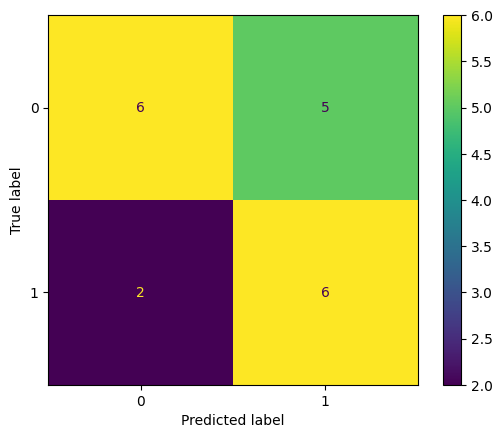

In [69]:
# Generate predictions with the best model
#y_test_pred = clf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [46]:
!pip install graphviz
!pip install pydotplus

Shape of X_train_clean: (0, 1141)
Shape of y_train_clean: (0,)


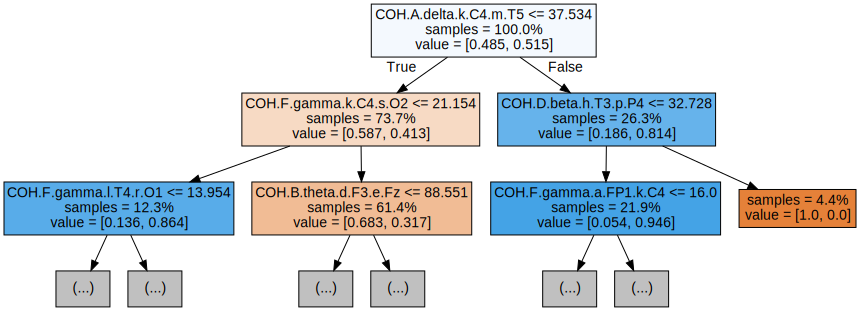

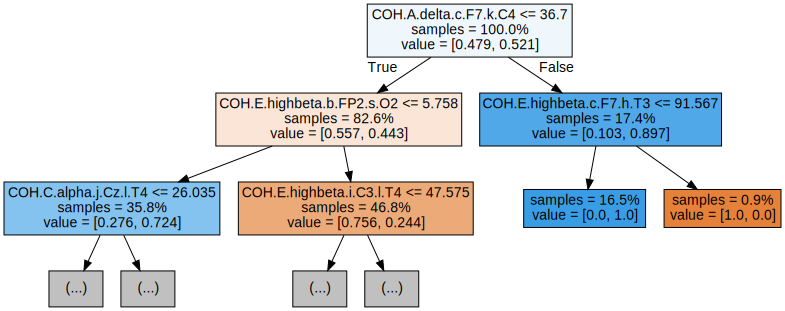

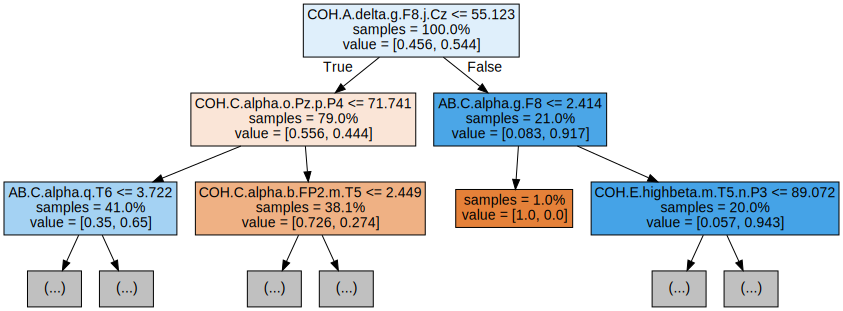

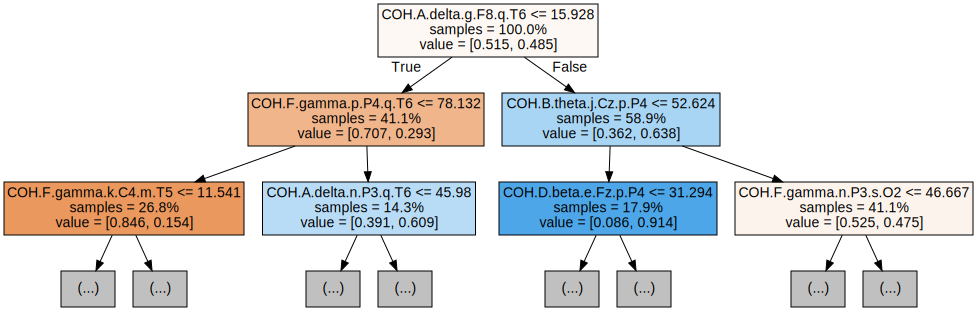

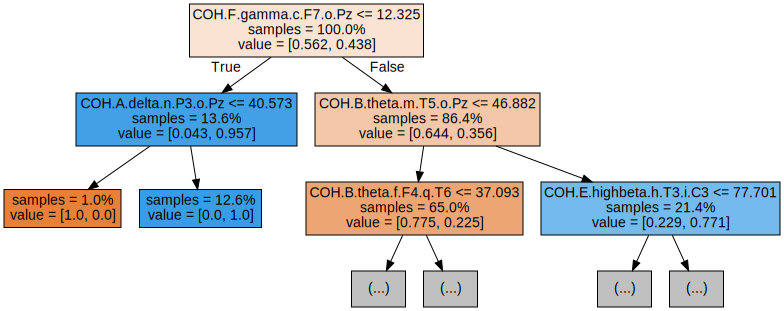

In [72]:
from sklearn.tree import export_graphviz
from io import StringIO  # Replacing six's StringIO
from IPython.display import Image
import pydotplus

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Drop rows with missing values
#X_train_clean = X_train.dropna()
#y_train_clean = y_train[X_train_clean.index]

#print("Shape of X_train_clean:", X_train_clean.shape)
#print("Shape of y_train_clean:", y_train_clean.shape)

# Train the random forest on the cleaned dataset
#rf.fit(X_train_clean, y_train_clean)
rf.fit(X_train, y_train)

# Export and display the first three trees
for i in range(5):
    tree = rf.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train_clean.columns,
                               filled=True,
                               max_depth=2,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)